In [0]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as F
spark = SparkSession.builder.appName("Data-Cleaning").getOrCreate()


In [0]:
df1 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/tables/Crashes_2.csv")
df2 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/tables/Persons_2.csv")
df3 = spark.read.format("csv").option("header", "true").load("dbfs:/FileStore/tables/Vehicles_2.csv")

In [0]:
df3.printSchema()

root
 |-- UNIQUE_ID: string (nullable = true)
 |-- COLLISION_ID: string (nullable = true)
 |-- CRASH_DATE: string (nullable = true)
 |-- CRASH_TIME: string (nullable = true)
 |-- VEHICLE_ID: string (nullable = true)
 |-- STATE_REGISTRATION: string (nullable = true)
 |-- VEHICLE_TYPE: string (nullable = true)
 |-- VEHICLE_MAKE: string (nullable = true)
 |-- VEHICLE_MODEL: string (nullable = true)
 |-- VEHICLE_YEAR: string (nullable = true)
 |-- TRAVEL_DIRECTION: string (nullable = true)
 |-- VEHICLE_OCCUPANTS: string (nullable = true)
 |-- DRIVER_SEX: string (nullable = true)
 |-- DRIVER_LICENSE_STATUS: string (nullable = true)
 |-- DRIVER_LICENSE_JURISDICTION: string (nullable = true)
 |-- PRE_CRASH: string (nullable = true)
 |-- POINT_OF_IMPACT: string (nullable = true)
 |-- VEHICLE_DAMAGE: string (nullable = true)
 |-- VEHICLE_DAMAGE_1: string (nullable = true)
 |-- VEHICLE_DAMAGE_2: string (nullable = true)
 |-- VEHICLE_DAMAGE_3: string (nullable = true)
 |-- PUBLIC_PROPERTY_DAMAGE:

In [0]:
df3.where(F.col("UNIQUE_ID").isNull()).count()

Out[4]: 0

In [0]:
df3.where(F.col("COLLISION_ID").isNull()).count()

Out[5]: 0

In [0]:
df3.where(F.col("CRASH_TIME").isNull()).count()

Out[6]: 0

In [0]:
df3=df3.withColumn("CRASH_TIME",F.to_timestamp(df3["CRASH_TIME"],"H:mm"))

In [0]:
df3.printSchema()

root
 |-- UNIQUE_ID: string (nullable = true)
 |-- COLLISION_ID: string (nullable = true)
 |-- CRASH_DATE: string (nullable = true)
 |-- CRASH_TIME: timestamp (nullable = true)
 |-- VEHICLE_ID: string (nullable = true)
 |-- STATE_REGISTRATION: string (nullable = true)
 |-- VEHICLE_TYPE: string (nullable = true)
 |-- VEHICLE_MAKE: string (nullable = true)
 |-- VEHICLE_MODEL: string (nullable = true)
 |-- VEHICLE_YEAR: string (nullable = true)
 |-- TRAVEL_DIRECTION: string (nullable = true)
 |-- VEHICLE_OCCUPANTS: string (nullable = true)
 |-- DRIVER_SEX: string (nullable = true)
 |-- DRIVER_LICENSE_STATUS: string (nullable = true)
 |-- DRIVER_LICENSE_JURISDICTION: string (nullable = true)
 |-- PRE_CRASH: string (nullable = true)
 |-- POINT_OF_IMPACT: string (nullable = true)
 |-- VEHICLE_DAMAGE: string (nullable = true)
 |-- VEHICLE_DAMAGE_1: string (nullable = true)
 |-- VEHICLE_DAMAGE_2: string (nullable = true)
 |-- VEHICLE_DAMAGE_3: string (nullable = true)
 |-- PUBLIC_PROPERTY_DAMA

In [0]:
df4 = df3.select(F.hour(df3["CRASH_TIME"]).alias("CRASH_HOUR"),"COLLISION_ID","UNIQUE_ID")

In [0]:
df4.show()

+----------+------------+---------+
|CRASH_HOUR|COLLISION_ID|UNIQUE_ID|
+----------+------------+---------+
|         9|      100201| 10385780|
|         8|     4213082| 19140702|
|        17|     3307608| 14887647|
|        20|     3308693| 14889754|
|        21|      297666| 14400270|
|        17|     3434155| 17044639|
|        13|     4229067| 19138701|
|        12|     3503027| 17303317|
|        11|      196425| 12254536|
|        18|     2975897| 11804847|
|        15|     3487936| 17285715|
|         8|     3268858| 14809587|
|        21|     3499697| 17307366|
|        17|     4229563| 19140791|
|        18|     4322767| 19694316|
|        19|      176016| 11912713|
|        14|     3516125| 17401424|
|        15|       79561|  9879462|
|        15|     3412270| 16952374|
|        17|     4229538| 19140656|
+----------+------------+---------+
only showing top 20 rows



In [0]:
df4.groupBy("CRASH_HOUR").agg(F.count("*").alias("count")).orderBy("CRASH_HOUR").show(30)

+----------+------+
|CRASH_HOUR| count|
+----------+------+
|         0|135760|
|         1| 73940|
|         2| 56769|
|         3| 50187|
|         4| 57337|
|         5| 61984|
|         6| 94426|
|         7|127331|
|         8|229029|
|         9|220788|
|        10|205854|
|        11|214206|
|        12|227588|
|        13|239974|
|        14|277216|
|        15|260210|
|        16|300218|
|        17|292292|
|        18|255612|
|        19|209552|
|        20|175375|
|        21|149530|
|        22|137861|
|        23|116851|
+----------+------+



In [0]:
from pyspark.sql import functions as F

# Define a function to categorize hours into intervals
def categorize_hours(hour):
    if hour >= 0 and hour < 6:
        return "0-6"
    elif hour >= 6 and hour < 12:
        return "6-12"
    elif hour >= 12 and hour < 18:
        return "12-18"
    else:
        return "18-24"

df5 = df4.withColumn("TIME_INTERVAL", F.udf(categorize_hours)(df4["CRASH_HOUR"]))


In [0]:
#use for time_interval as final feature
df5.show()

+----------+------------+---------+-------------+
|CRASH_HOUR|COLLISION_ID|UNIQUE_ID|TIME_INTERVAL|
+----------+------------+---------+-------------+
|         9|      100201| 10385780|         6-12|
|         8|     4213082| 19140702|         6-12|
|        17|     3307608| 14887647|        12-18|
|        20|     3308693| 14889754|        18-24|
|        21|      297666| 14400270|        18-24|
|        17|     3434155| 17044639|        12-18|
|        13|     4229067| 19138701|        12-18|
|        12|     3503027| 17303317|        12-18|
|        11|      196425| 12254536|         6-12|
|        18|     2975897| 11804847|        18-24|
|        15|     3487936| 17285715|        12-18|
|         8|     3268858| 14809587|         6-12|
|        21|     3499697| 17307366|        18-24|
|        17|     4229563| 19140791|        12-18|
|        18|     4322767| 19694316|        18-24|
|        19|      176016| 11912713|        18-24|
|        14|     3516125| 17401424|        12-18|


In [0]:

df5.display()

CRASH_HOUR COLLISION_ID UNIQUE_ID TIME_INTERVAL 9 100201 10385780 6-12 8 4213082 19140702 6-12 17 3307608 14887647 12-18 20 3308693 14889754 18-24 21 297666 14400270 18-24 17 3434155 17044639 12-18 13 4229067 19138701 12-18 12 3503027 17303317 12-18 11 196425 12254536 6-12 18 2975897 11804847 18-24 15 3487936 17285715 12-18 8 3268858 14809587 6-12 21 3499697 17307366 18-24 17 4229563 19140791 12-18 18 4322767 19694316 18-24 19 176016 11912713 18-24 14 3516125 17401424 12-18 15 79561 9879462 12-18 15 3412270 16952374 12-18 17 4229538 19140656 12-18 16 4228839 19139721 12-18 17 19615 8704041 12-18 16 3542089 17222837 12-18 21 328209 9882078 18-24 1 3108421 14221219 0-6 7 3579297 17277100 6-12 14 1014563 11758197 12-18 20 3307950 14888316 18-24 12 3533118 17169289 12-18 22 31225 8889301 18-24 16 1113 8393362 12-18 23 4228955 19139288 18-24 6 4223842 19141039 6-12 21 1037702 12553012 18-24 11 3326836 14925931 6-12 6 3262048 14795557 6-12 17 9285 8483670 12-18 12 1009244 8404435 12-18 10 4228644 19138486 6-12 12 4229205 19139804 12-18 7 126113 10957637 6-12 13 4229517 19140710 12-18 12 57863 9437002 12-18 20 4229127 19140446 18-24 14 3277120 14826434 12-18 17 4229563 19140792 12-18 12 301826 14462100 12-18 7 12254 8569561 6-12 21 4229018 19139096 18-24 22 2912640 10158114 18-24 15 3204325 14658856 12-18 3 3391837 15054978 0-6 16 45437 9273416 12-18 4 2960132 11314325 0-6 11 4228921 19138903 6-12 10 546846 10062169 6-12 14 4229375 19140226 12-18 22 3291849 14856165 18-24 20 3097477 13851173 18-24 19 3432659 17045096 18-24 3 4228473 19138211 0-6 13 4228752 19139716 12-18 17 3482489 17187987 12-18 10 1011403 13097877 6-12 8 4228597 19138997 6-12 15 1034629 10230895 12-18 13 3499115 17179435 12-18 5 3315642 14903590 0-6 16 2927027 10385619 12-18 15 3279405 14831062 12-18 17 2992280 12313986 12-18 7 3285154 14842705 6-12 16 10017 8531488 12-18 7 3045325 13233679 6-12 7 86647 10055389 6-12 8 3378782 15029165 6-12 9 4228826 19139454 6-12 15 3194230 14634311 12-18 10 3394984 15061195 6-12 22 4229131 19140448 18-24 21 3404065 15079321 18-24 23 4229698 19140660 18-24 15 4229321 19140322 12-18 16 240527 13230693 12-18 16 3209911 14672130 12-18 18 4229434 19139740 18-24 21 3199977 14648143 18-24 16 4228914 19138956 12-18 16 4229005 19139066 12-18 16 335025 9977047 12-18 16 2148 8395403 12-18 17 3146846 14519990 12-18 7 4228592 19139241 6-12 1 10366 8532175 0-6 18 3181296 14603135 18-24 17 3240710 14747912 12-18 14 4229059 19139175 12-18 21 138062 11161855 18-24 23 3444930 17072438 18-24 16 4228907 19139591 12-18 15 4228939 19138926 12-18 8 244061 13239670 6-12 17 4229062 19139178 12-18 1 4228440 19137605 0-6 18 264725 13746922 18-24 16 2849078 9283345 12-18 22 4229031 19139393 18-24 8 362858 9132270 6-12 15 42484 9124769 12-18 15 314334 13429375 12-18 20 4228906 19139602 18-24 13 175219 11866785 12-18 19 4228979 19139689 18-24 13 4229190 19140520 12-18 20 3157995 14546516 18-24 15 302418 14463368 12-18 16 4228912 19139431 12-18 18 2865358 9508187 18-24 18 3478113 17234958 18-24 9 4229653 19140971 6-12 15 2921 8396973 12-18 23 349583 14411040 18-24 18 3171 8397469 18-24 14 4229012 19139060 12-18 13 1010643 9509261 12-18 6 359652 9723046 6-12 17 4229068 19138706 12-18 16 95966 10316936 12-18 16 3519120 17316890 12-18 18 4229528 19140729 18-24 21 4229116 19139989 18-24 14 4228970 19139681 12-18 15 3167 8397460 12-18 23 184410 12005192 18-24 21 4228925 19139436 18-24 8 4228675 19139524 6-12 16 341525 8708957 12-18 17 4229069 19138708 12-18 15 3379266 15030134 12-18 14 33951 8995418 12-18 8 4228675 19139523 6-12 23 3452570 17049525 18-24 0 236693 13089065 0-6 17 4228896 19139466 12-18 21 3292788 14858054 18-24 20 266109 13750457 18-24 17 4229125 19139862 12-18 19 4228913 19139432 18-24 12 239864 13229136 12-18 9 3547635 17319910 6-12 13 55557 9396182 12-18 12 4229052 19138659 12-18 9 335730 12056337 6-12 17 4229068 19138705 12-18 22 11284 8533957 18-24 19 3200207 14648689 18-24 14 3065444 13529255 12-18 15 4228941 19139383 12-18 9 4228729 19139525 

In [0]:
hour_interval_viz = df5.groupBy("TIME_INTERVAL").agg(F.count("*").alias("count"))

In [0]:
hour_interval_viz = hour_interval_viz.toPandas()

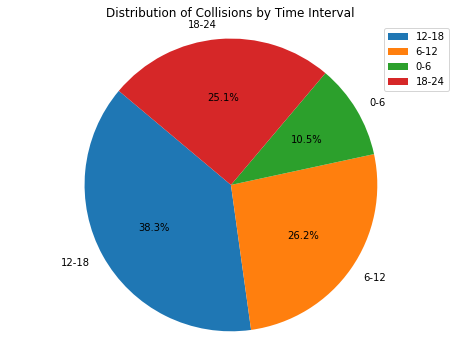

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.pie(hour_interval_viz['count'], labels=hour_interval_viz['TIME_INTERVAL'], autopct='%1.1f%%', startangle=140)
plt.legend()
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of Collisions by Time Interval')
plt.show()

In [0]:
df_precrash = df3.filter(F.col("PRE_CRASH").isNotNull())
df_precrash.count()

Out[19]: 3249681

In [0]:
df3.select(F.col("PRE_CRASH")).distinct().count()

Out[20]: 20

In [0]:
df3.select(F.col("PRE_CRASH")).groupBy("PRE_CRASH").agg(F.count("*").alias("count")).show(truncate = False)

+--------------------------+-------+
|PRE_CRASH                 |count  |
+--------------------------+-------+
|Making Right Turn on Red  |892    |
|Merging                   |53019  |
|null                      |920209 |
|Starting in Traffic       |12961  |
|Passing                   |34310  |
|Making U Turn             |28536  |
|Starting from Parking     |53230  |
|Stopped in Traffic        |149893 |
|Other*                    |34882  |
|Backing                   |110951 |
|Making Left Turn on Red   |998    |
|Making Left Turn          |200217 |
|Entering Parked Position  |40763  |
|Going Straight Ahead      |1590661|
|Police Pursuit            |1350   |
|Changing Lanes            |95346  |
|Slowing or Stopping       |115326 |
|Avoiding Object in Roadway|3558   |
|Parked                    |558116 |
|Making Right Turn         |164672 |
+--------------------------+-------+



In [0]:
right
left
right on red
left on red
u-turn

stopping
parking
stopped


java.lang.RuntimeException: abort: DriverClient destroyed
	at com.databricks.backend.daemon.driver.DriverClient.$anonfun$poll$4(DriverClient.scala:677)
	at scala.concurrent.Future.$anonfun$flatMap$1(Future.scala:307)
	at scala.concurrent.impl.Promise.$anonfun$transformWith$1(Promise.scala:54)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:77)
	at com.databricks.threading.DatabricksExecutionContext$InstrumentedRunnable.run(DatabricksExecutionContext.scala:36)
	at com.databricks.threading.NamedExecutor$$anon$2.$anonfun$run$2(NamedExecutor.scala:468)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.logging.AttributionContextTracing.$anonfun$withAttributionContext$1(AttributionContextTracing.scala:48)
	at com.databricks.logging.AttributionContext$.$anonfun$withValue$1(AttributionContext.scala:244)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(AttributionContext.scala:240)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext(AttributionContextTracing.scala:46)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext$(AttributionContextTracing.scala:43)
	at com.databricks.threading.NamedExecutor.withAttributionContext(NamedExecutor.scala:385)
	at com.databricks.threading.NamedExecutor$$anon$2.$anonfun$run$1(NamedExecutor.scala:462)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.context.integrity.IntegrityCheckContext$ThreadLocalStorage$.withValue(IntegrityCheckContext.scala:72)
	at com.databricks.threading.NamedExecutor$$anon$2.run(NamedExecutor.scala:461)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)

In [0]:
# Define the conditions and corresponding buckets
conditions = [
    (F.col("PRE_CRASH").isNull(), "Unknown"),
    (F.col("PRE_CRASH").contains("Turn"), "Turn"),
    (F.col("PRE_CRASH").contains("Stopping") | F.col("PRE_CRASH").contains("Parked") | F.col("PRE_CRASH").contains("Stopped"), "Stop/Park"),
    (F.col("PRE_CRASH").contains("Object") | F.col("PRE_CRASH").contains("Merging") | F.col("PRE_CRASH").contains("Passing") | F.col("PRE_CRASH").contains("Starting") | F.col("PRE_CRASH").contains("Lanes"), "Maneuver"),
    (F.col("PRE_CRASH").contains("Going"), "Going Straight Ahead")
]

# Apply the conditions using when and otherwise
df_with_buckets = df3.withColumn("PRE_CRASH_BUCKET", 
                                 F.when(conditions[0][0], conditions[0][1])
                                  .when(conditions[1][0], conditions[1][1])
                                  .when(conditions[2][0], conditions[2][1])
                                  .when(conditions[3][0], conditions[3][1])
                                  .when(conditions[4][0], conditions[4][1])
                                  .otherwise("Other"))



In [0]:
bucket = df_with_buckets.groupBy("PRE_CRASH_BUCKET").agg(F.count("*").alias("count"))

In [0]:
bucket.toPandas()

PRE_CRASH_BUCKET 
 count 
 
 
 
 
 0 
 Maneuver 
 252424 
 
 
 1 
 Unknown 
 920209 
 
 
 2 
 Other 
 147183 
 
 
 3 
 Stop/Park 
 864098 
 
 
 4 
 Going Straight Ahead 
 1590661 
 
 
 5 
 Turn 
 395315

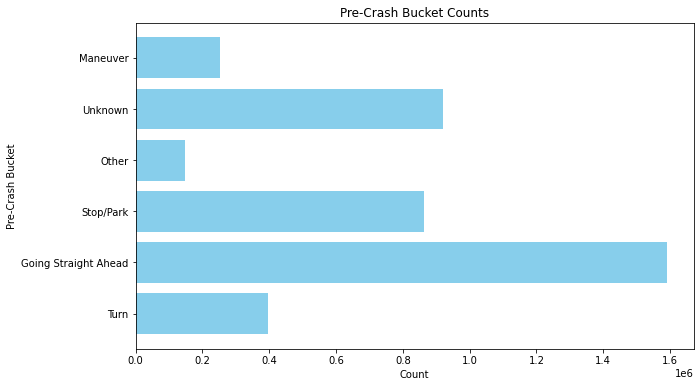

In [0]:
import matplotlib.pyplot as plt

# Data
categories = ['Maneuver', 'Unknown', 'Other', 'Stop/Park', 'Going Straight Ahead', 'Turn']
counts = [252424, 920209, 147183, 864098, 1590661, 395315]

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(categories, counts, color='skyblue')
plt.xlabel('Count')
plt.ylabel('Pre-Crash Bucket')
plt.title('Pre-Crash Bucket Counts')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count on top
plt.show()



In [0]:
df_with_buckets_Precrash = df_with_buckets.select("COLLISION_ID","UNIQUE_ID","PRE_CRASH","PRE_CRASH_BUCKET")

In [0]:
df_with_buckets_Precrash.display()

COLLISION_ID UNIQUE_ID PRE_CRASH PRE_CRASH_BUCKET 100201 10385780 null Unknown 4213082 19140702 Going Straight Ahead Going Straight Ahead 3307608 14887647 Going Straight Ahead Going Straight Ahead 3308693 14889754 Parked Stop/Park 297666 14400270 null Unknown 3434155 17044639 Merging Maneuver 4229067 19138701 Parked Stop/Park 3503027 17303317 Going Straight Ahead Going Straight Ahead 196425 12254536 null Unknown 2975897 11804847 null Unknown 3487936 17285715 Stopped in Traffic Stop/Park 3268858 14809587 Going Straight Ahead Going Straight Ahead 3499697 17307366 Going Straight Ahead Going Straight Ahead 4229563 19140791 Going Straight Ahead Going Straight Ahead 4322767 19694316 Going Straight Ahead Going Straight Ahead 176016 11912713 null Unknown 3516125 17401424 Stopped in Traffic Stop/Park 79561 9879462 null Unknown 3412270 16952374 Passing Maneuver 4229538 19140656 Going Straight Ahead Going Straight Ahead 4228839 19139721 Going Straight Ahead Going Straight Ahead 19615 8704041 null Unknown 3542089 17222837 Going Straight Ahead Going Straight Ahead 328209 9882078 Backing Other 3108421 14221219 Going Straight Ahead Going Straight Ahead 3579297 17277100 Parked Stop/Park 1014563 11758197 Going Straight Ahead Going Straight Ahead 3307950 14888316 Changing Lanes Maneuver 3533118 17169289 Merging Maneuver 31225 8889301 null Unknown 1113 8393362 null Unknown 4228955 19139288 Going Straight Ahead Going Straight Ahead 4223842 19141039 Going Straight Ahead Going Straight Ahead 1037702 12553012 Making Right Turn Turn 3326836 14925931 Parked Stop/Park 3262048 14795557 Parked Stop/Park 9285 8483670 null Unknown 1009244 8404435 Backing Other 4228644 19138486 Going Straight Ahead Going Straight Ahead 4229205 19139804 Entering Parked Position Stop/Park 126113 10957637 null Unknown 4229517 19140710 Going Straight Ahead Going Straight Ahead 57863 9437002 null Unknown 4229127 19140446 Going Straight Ahead Going Straight Ahead 3277120 14826434 Going Straight Ahead Going Straight Ahead 4229563 19140792 Going Straight Ahead Going Straight Ahead 301826 14462100 null Unknown 12254 8569561 null Unknown 4229018 19139096 Going Straight Ahead Going Straight Ahead 2912640 10158114 null Unknown 3204325 14658856 Going Straight Ahead Going Straight Ahead 3391837 15054978 Parked Stop/Park 45437 9273416 null Unknown 2960132 11314325 null Unknown 4228921 19138903 Slowing or Stopping Stop/Park 546846 10062169 Parked Stop/Park 4229375 19140226 Making Left Turn Turn 3291849 14856165 Stopped in Traffic Stop/Park 3097477 13851173 null Unknown 3432659 17045096 Going Straight Ahead Going Straight Ahead 4228473 19138211 Going Straight Ahead Going Straight Ahead 4228752 19139716 Making Right Turn Turn 3482489 17187987 Going Straight Ahead Going Straight Ahead 1011403 13097877 Slowing or Stopping Stop/Park 4228597 19138997 Going Straight Ahead Going Straight Ahead 1034629 10230895 Going Straight Ahead Going Straight Ahead 3499115 17179435 Making Right Turn Turn 3315642 14903590 Making Right Turn Turn 2927027 10385619 null Unknown 3279405 14831062 Going Straight Ahead Going Straight Ahead 2992280 12313986 null Unknown 3285154 14842705 Making Left Turn Turn 10017 8531488 null Unknown 3045325 13233679 null Unknown 86647 10055389 null Unknown 3378782 15029165 Parked Stop/Park 4228826 19139454 Backing Other 3194230 14634311 Parked Stop/Park 3394984 15061195 Parked Stop/Park 4229131 19140448 Going Straight Ahead Going Straight Ahead 3404065 15079321 Going Straight Ahead Going Straight Ahead 4229698 19140660 Parked Stop/Park 4229321 19140322 null Unknown 240527 13230693 null Unknown 3209911 14672130 Backing Other 4229434 19139740 Backing Other 3199977 14648143 Starting from Parking Maneuver 4228914 19138956 Going Straight Ahead Going Straight Ahead 4229005 19139066 null Unknown 335025 9977047 Slowing or Stopping Stop/Park 2148 8395403 null Unknown 3146846 14519990 Going Straight Ahead Going Straight Ahead 4228592 19139241 Making Right Turn Turn 10366 8532175 null Unknown 318

In [0]:
df3.where(F.col("VEHICLE_DAMAGE").isNull()).count()

Out[26]: 1724304

In [0]:
df3.groupBy("VEHICLE_DAMAGE").count().orderBy("count",ascending =False).show(50,truncate =False)

+-------------------------+-------+
|VEHICLE_DAMAGE           |count  |
+-------------------------+-------+
|null                     |1724304|
|Center Front End         |379883 |
|Left Front Bumper        |257665 |
|Center Back End          |254523 |
|Right Front Bumper       |236863 |
|No Damage                |230835 |
|Left Front Quarter Panel |170738 |
|Right Front Quarter Panel|166074 |
|Left Rear Quarter Panel  |135499 |
|Left Side Doors          |134793 |
|Left Rear Bumper         |124400 |
|Right Side Doors         |112599 |
|Right Rear Quarter Panel |92890  |
|Right Rear Bumper        |86537  |
|Other                    |45706  |
|Roof                     |4959   |
|Demolished               |4177   |
|Overturned               |2740   |
|Trailer                  |2534   |
|Undercarriage            |2171   |
+-------------------------+-------+



In [0]:
df3.where(F.col("PUBLIC_PROPERTY_DAMAGE").isNull()).count()

Out[28]: 1528858

In [0]:
df3.groupBy("PUBLIC_PROPERTY_DAMAGE").count().orderBy("count",ascending =False).show(50,truncate =False)

+----------------------+-------+
|PUBLIC_PROPERTY_DAMAGE|count  |
+----------------------+-------+
|N                     |2310525|
|null                  |1528858|
|Unspecified           |315446 |
|Y                     |15061  |
+----------------------+-------+



In [0]:

df3.groupBy("POINT_OF_IMPACT").count().orderBy("count",ascending =False).show(50,truncate =False)

+-------------------------+-------+
|POINT_OF_IMPACT          |count  |
+-------------------------+-------+
|null                     |1700038|
|Center Front End         |426425 |
|Left Front Bumper        |312547 |
|Center Back End          |297782 |
|Right Front Bumper       |275950 |
|Right Front Quarter Panel|176858 |
|Left Front Quarter Panel |174176 |
|Left Rear Quarter Panel  |142019 |
|Left Side Doors          |130674 |
|Left Rear Bumper         |129917 |
|Right Side Doors         |109309 |
|Right Rear Quarter Panel |101090 |
|Right Rear Bumper        |86370  |
|No Damage                |53307  |
|Other                    |39592  |
|Roof                     |4950   |
|Trailer                  |4094   |
|Overturned               |1753   |
|Undercarriage            |1596   |
|Demolished               |1443   |
+-------------------------+-------+



In [0]:
#contributing factors


java.lang.RuntimeException: abort: DriverClient destroyed
	at com.databricks.backend.daemon.driver.DriverClient.$anonfun$poll$4(DriverClient.scala:677)
	at scala.concurrent.Future.$anonfun$flatMap$1(Future.scala:307)
	at scala.concurrent.impl.Promise.$anonfun$transformWith$1(Promise.scala:54)
	at scala.concurrent.impl.CallbackRunnable.run(Promise.scala:77)
	at com.databricks.threading.DatabricksExecutionContext$InstrumentedRunnable.run(DatabricksExecutionContext.scala:36)
	at com.databricks.threading.NamedExecutor$$anon$2.$anonfun$run$2(NamedExecutor.scala:468)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.logging.AttributionContextTracing.$anonfun$withAttributionContext$1(AttributionContextTracing.scala:48)
	at com.databricks.logging.AttributionContext$.$anonfun$withValue$1(AttributionContext.scala:244)
	at scala.util.DynamicVariable.withValue(DynamicVariable.scala:62)
	at com.databricks.logging.AttributionContext$.withValue(AttributionContext.scala:240)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext(AttributionContextTracing.scala:46)
	at com.databricks.logging.AttributionContextTracing.withAttributionContext$(AttributionContextTracing.scala:43)
	at com.databricks.threading.NamedExecutor.withAttributionContext(NamedExecutor.scala:385)
	at com.databricks.threading.NamedExecutor$$anon$2.$anonfun$run$1(NamedExecutor.scala:462)
	at scala.runtime.java8.JFunction0$mcV$sp.apply(JFunction0$mcV$sp.java:23)
	at com.databricks.context.integrity.IntegrityCheckContext$ThreadLocalStorage$.withValue(IntegrityCheckContext.scala:72)
	at com.databricks.threading.NamedExecutor$$anon$2.run(NamedExecutor.scala:461)
	at java.base/java.util.concurrent.ThreadPoolExecutor.runWorker(ThreadPoolExecutor.java:1128)
	at java.base/java.util.concurrent.ThreadPoolExecutor$Worker.run(ThreadPoolExecutor.java:628)
	at java.base/java.lang.Thread.run(Thread.java:829)

In [0]:
df3.where(F.col("CONTRIBUTING_FACTOR_1").isNull()).count()

Out[13]: 147345

In [0]:
df3.where(F.col("CONTRIBUTING_FACTOR_2").isNull()).count()

Out[14]: 1686870

In [0]:
df3.where(F.col("CONTRIBUTING_FACTOR_1").isNotNull() & F.col("CONTRIBUTING_FACTOR_2").isNull() ).count()

Out[15]: 1539525

In [0]:
df3.where(F.col("CONTRIBUTING_FACTOR_1").isNull() & F.col("CONTRIBUTING_FACTOR_2").isNotNull() ).count()

Out[16]: 0

In [0]:
df_c1 = df3.select("COLLISION_ID","UNIQUE_ID","CONTRIBUTING_FACTOR_1","CONTRIBUTING_FACTOR_2")

In [0]:
df_c1 = df_c1.withColumn("CONTRIBUTING_FACTOR_2", 
                                       F.when(F.col("CONTRIBUTING_FACTOR_1") == F.col("CONTRIBUTING_FACTOR_2"), 
                                            None).otherwise(F.col("CONTRIBUTING_FACTOR_2")))

In [0]:
df_c1.select(F.col("CONTRIBUTING_FACTOR_1"),F.col("CONTRIBUTING_FACTOR_2")).where(F.col("CONTRIBUTING_FACTOR_1")== F.col("CONTRIBUTING_FACTOR_2")).count()

Out[19]: 0

In [0]:
from pyspark.sql.functions import explode, array

from pyspark.sql.functions import explode, array, col

stacked_factors = df_c1.select(explode(array("CONTRIBUTING_FACTOR_1", "CONTRIBUTING_FACTOR_2")).alias("factors"))

# Count occurrences of each factor
factor_counts = stacked_factors.groupBy("factors").count()

In [0]:
factor_counts.orderBy('count',ascending =False).show(100,truncate = False)

+-----------------------------------------------------+-------+
|factors                                              |count  |
+-----------------------------------------------------+-------+
|null                                                 |3243668|
|Unspecified                                          |3007849|
|Driver Inattention/Distraction                       |609687 |
|Following Too Closely                                |181922 |
|Failure to Yield Right-of-Way                        |177914 |
|Other Vehicular                                      |110530 |
|Passing or Lane Usage Improper                       |99812  |
|Backing Unsafely                                     |93374  |
|Passing Too Closely                                  |82395  |
|Turning Improperly                                   |78013  |
|Unsafe Lane Changing                                 |73292  |
|Driver Inexperience                                  |70440  |
|Fatigued/Drowsy                        

In [0]:
stacked_factors.withColumn(factors)

---------------------------------------------------------------------------
NameError                                 Traceback (most recent call last)
File <command-2661564761657415>:1
----> 1 stacked_factors.withColumn(factors)

NameError: name 'factors' is not defined

In [0]:
from pyspark.sql.functions import when


df_c1 = df_c1.withColumn("CONTRIBUTING_FACTOR_1", 
                         when(df_c1["CONTRIBUTING_FACTOR_1"] == "Driver Inattention/Distraction", "Driver Behavior")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Following Too Closely", "Driver Behavior")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Failure to Keep Right", "Driver Behavior")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Driver Inexperience", "Driver Behavior")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Aggressive Driving/Road Rage", "Driver Behavior")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Passing Too Closely", "Driver Behavior")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Failure to Yield Right-of-Way", "Driver Behavior")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Turning Improperly", "Driver Behavior")
                        .otherwise(df_c1["CONTRIBUTING_FACTOR_1"]))
df_c1 = df_c1.withColumn("CONTRIBUTING_FACTOR_1", 
                        when(df_c1["CONTRIBUTING_FACTOR_1"] == "Other Vehicular", "Vehicle Operation")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Driverless/Runaway Vehicle", "Vehicle Operation")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Vehicle Vandalism", "Vehicle Operation")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Passing or Lane Usage Improper", "Vehicle Operation")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Oversized Vehicle", "Vehicle Operation")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Backing Unsafely", "Vehicle Operation")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Unsafe Lane Changing", "Vehicle Operation")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Unsafe Speed", "Vehicle Operation")
                        .otherwise(df_c1["CONTRIBUTING_FACTOR_1"]))
df_c1 = df_c1.withColumn("CONTRIBUTING_FACTOR_1", 
                        when(df_c1["CONTRIBUTING_FACTOR_1"] == "Pavement Slippery", "Environmental Conditions")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "View Obstructed/Limited", "Environmental Conditions")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Lane Marking Improper/Inadequate", "Environmental Conditions")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Glare", "Environmental Conditions")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Obstruction/Debris", "Environmental Conditions")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Pavement Defective", "Environmental Conditions")
                        .otherwise(df_c1["CONTRIBUTING_FACTOR_1"]))
df_c1 = df_c1.withColumn("CONTRIBUTING_FACTOR_1", 
                        when(df_c1["CONTRIBUTING_FACTOR_1"] == "Fatigued/Drowsy", "Physical State")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Lost Consciousness", "Physical State")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Physical Disability", "Physical State")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Fell Asleep", "Physical State")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Illness", "Physical State")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Illnes", "Physical State")
                        .otherwise(df_c1["CONTRIBUTING_FACTOR_1"]))
df_c1 = df_c1.withColumn("CONTRIBUTING_FACTOR_1", 
                        when(df_c1["CONTRIBUTING_FACTOR_1"] == "Outside Car Distraction", "External Distractions")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Eating or Drinking", "External Distractions")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Passenger Distraction", "External Distractions")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Pedestrian/Bicyclist/Other Pedestrian Error/Confusion", "External Distractions")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Animals Action", "External Distractions")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Brakes Defective", "Equipment Failure")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Tire Failure/Inadequate", "Equipment Failure")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Tinted Windows", "Equipment Failure")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Other Electronic Device", "Equipment Failure")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Accelerator Defective", "Equipment Failure")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Steering Failure", "Equipment Failure")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Tow Hitch Defective", "Equipment Failure")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Headlights Defective", "Equipment Failure")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Other Lighting Defects", "Equipment Failure")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Shoulders Defective/Improper", "Equipment Failure")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Windshield Inadequate", "Equipment Failure")
                        .otherwise(df_c1["CONTRIBUTING_FACTOR_1"]))
df_c1 = df_c1.withColumn("CONTRIBUTING_FACTOR_1", 
                        when(df_c1["CONTRIBUTING_FACTOR_1"] == "Alcohol Involvement", "Substances")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Prescription Medication", "Substances")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Drugs (illegal)", "Substances")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Drugs (Illegal)", "Substances")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Traffic Control Disregarded", "Traffic Control")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Reaction to Uninvolved Vehicle", "Traffic Control")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Reaction to Other Uninvolved Vehicle", "Traffic Control")
                        .otherwise(df_c1["CONTRIBUTING_FACTOR_1"]))
df_c1 = df_c1.withColumn("CONTRIBUTING_FACTOR_1", 
                        when(df_c1["CONTRIBUTING_FACTOR_1"] == "Cell Phone (hand-Held)", "Communication Devices")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Cell Phone (hands-free)", "Communication Devices")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Communication Devicesl", "Communication Devices")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Cell Phone (hand-held)", "Communication Devices")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Listening/Using Headphones", "Communication Devicesl")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Texting", "Communication Devices")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] == "Using On Board Navigation Device", "Communication Devices")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"].isNull(), "Unspecified")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] =="1", "Unspecified")
                        .when(df_c1["CONTRIBUTING_FACTOR_1"] =="80", "Unspecified")
                        .otherwise(df_c1["CONTRIBUTING_FACTOR_1"]))


In [0]:
df_c1.select("CONTRIBUTING_FACTOR_1").groupBy("CONTRIBUTING_FACTOR_1").count().show(truncate = False)

+-------------------------------------------+-------+
|CONTRIBUTING_FACTOR_1                      |count  |
+-------------------------------------------+-------+
|Substances                                 |44652  |
|Unspecified                                |2512246|
|Equipment Failure                          |18408  |
|Environmental Conditions                   |55771  |
|Driver Behavior                            |962456 |
|Vehicle Operation                          |355236 |
|Communication Devicesl                     |35     |
|Traffic Control                            |70232  |
|External Distractions                      |39293  |
|Traffic Control Device Improper/Non-Working|1394   |
|Physical State                             |108938 |
|Communication Devices                      |1229   |
+-------------------------------------------+-------+



In [0]:
df_c1 = df_c1.withColumn("CONTRIBUTING_FACTOR_2", 
                         when(df_c1["CONTRIBUTING_FACTOR_2"] == "Driver Inattention/Distraction", "Driver Behavior")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Following Too Closely", "Driver Behavior")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Failure to Keep Right", "Driver Behavior")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Driver Inexperience", "Driver Behavior")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Aggressive Driving/Road Rage", "Driver Behavior")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Passing Too Closely", "Driver Behavior")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Failure to Yield Right-of-Way", "Driver Behavior")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Turning Improperly", "Driver Behavior")
                        .otherwise(df_c1["CONTRIBUTING_FACTOR_2"]))
df_c1 = df_c1.withColumn("CONTRIBUTING_FACTOR_2", 
                        when(df_c1["CONTRIBUTING_FACTOR_2"] == "Other Vehicular", "Vehicle Operation")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Driverless/Runaway Vehicle", "Vehicle Operation")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Vehicle Vandalism", "Vehicle Operation")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Passing or Lane Usage Improper", "Vehicle Operation")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Oversized Vehicle", "Vehicle Operation")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Backing Unsafely", "Vehicle Operation")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Unsafe Lane Changing", "Vehicle Operation")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Unsafe Speed", "Vehicle Operation")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Pavement Slippery", "Environmental Conditions")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "View Obstructed/Limited", "Environmental Conditions")
                        .otherwise(df_c1["CONTRIBUTING_FACTOR_2"]))
df_c1 = df_c1.withColumn("CONTRIBUTING_FACTOR_2", 
                        when(df_c1["CONTRIBUTING_FACTOR_2"] == "Lane Marking Improper/Inadequate", "Environmental Conditions")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Glare", "Environmental Conditions")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Obstruction/Debris", "Environmental Conditions")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Pavement Defective", "Environmental Conditions")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Fatigued/Drowsy", "Physical State")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Lost Consciousness", "Physical State")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Physical Disability", "Physical State")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Fell Asleep", "Physical State")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Illness", "Physical State")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Illnes", "Physical State")
                        .otherwise(df_c1["CONTRIBUTING_FACTOR_2"]))
df_c1 = df_c1.withColumn("CONTRIBUTING_FACTOR_2", 
                        when(df_c1["CONTRIBUTING_FACTOR_2"] == "Outside Car Distraction", "External Distractions")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Eating or Drinking", "External Distractions")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Passenger Distraction", "External Distractions")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Pedestrian/Bicyclist/Other Pedestrian Error/Confusion", "External Distractions")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Animals Action", "External Distractions")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Brakes Defective", "Equipment Failure")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Tire Failure/Inadequate", "Equipment Failure")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Tinted Windows", "Equipment Failure")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Other Electronic Device", "Equipment Failure")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Accelerator Defective", "Equipment Failure")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Steering Failure", "Equipment Failure")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Tow Hitch Defective", "Equipment Failure")
                        .otherwise(df_c1["CONTRIBUTING_FACTOR_2"]))
df_c1 = df_c1.withColumn("CONTRIBUTING_FACTOR_2", 
                        when(df_c1["CONTRIBUTING_FACTOR_2"] == "Headlights Defective", "Equipment Failure")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Other Lighting Defects", "Equipment Failure")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Shoulders Defective/Improper", "Equipment Failure")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Windshield Inadequate", "Equipment Failure")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Alcohol Involvement", "Substances")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Prescription Medication", "Substances")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Drugs (illegal)", "Substances")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Drugs (Illegal)", "Substances")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Traffic Control Disregarded", "Traffic Control")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Reaction to Uninvolved Vehicle", "Traffic Control")
                        .otherwise(df_c1["CONTRIBUTING_FACTOR_2"]))
df_c1 = df_c1.withColumn("CONTRIBUTING_FACTOR_2", 
                        when(df_c1["CONTRIBUTING_FACTOR_2"] == "Reaction to Other Uninvolved Vehicle", "Traffic Control")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Cell Phone (hand-Held)", "Communication Devices")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Cell Phone (hands-free)", "Communication Devices")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Communication Devicesl", "Communication Devices")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Cell Phone (hand-held)", "Communication Devices")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Listening/Using Headphones", "Communication Devicesl")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Texting", "Communication Devices")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] == "Using On Board Navigation Device", "Communication Devices")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"].isNull(), "Unspecified")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] =="1", "Unspecified")
                        .when(df_c1["CONTRIBUTING_FACTOR_2"] =="80", "Unspecified")



                        .otherwise(df_c1["CONTRIBUTING_FACTOR_2"]))

In [0]:
df_c1.display()

COLLISION_ID UNIQUE_ID CONTRIBUTING_FACTOR_1 CONTRIBUTING_FACTOR_2 100201 10385780 Unspecified Unspecified 4213082 19140702 Driver Behavior Unspecified 3307608 14887647 Driver Behavior Unspecified 3308693 14889754 Unspecified Unspecified 297666 14400270 Vehicle Operation Unspecified 3434155 17044639 Driver Behavior Vehicle Operation 4229067 19138701 Unspecified Unspecified 3503027 17303317 Driver Behavior Unspecified 196425 12254536 Unspecified Unspecified 2975897 11804847 Driver Behavior Unspecified 3487936 17285715 Unspecified Unspecified 3268858 14809587 External Distractions Unspecified 3499697 17307366 Unspecified Unspecified 4229563 19140791 Unspecified Unspecified 4322767 19694316 Traffic Control Unspecified 176016 11912713 Unspecified Unspecified 3516125 17401424 Unspecified Unspecified 79561 9879462 Unspecified Unspecified 3412270 16952374 Vehicle Operation Traffic Control 4229538 19140656 Unspecified Unspecified 4228839 19139721 Unspecified Unspecified 19615 8704041 Unspecified Unspecified 3542089 17222837 Unspecified Unspecified 328209 9882078 Unspecified Unspecified 3108421 14221219 Unspecified Unspecified 3579297 17277100 Unspecified Unspecified 1014563 11758197 Unspecified Unspecified 3307950 14888316 Unspecified Unspecified 3533118 17169289 Driver Behavior Unspecified 31225 8889301 Unspecified Unspecified 1113 8393362 Unspecified Unspecified 4228955 19139288 Unspecified Unspecified 4223842 19141039 Driver Behavior Unspecified 1037702 12553012 Driver Behavior Unspecified 3326836 14925931 Unspecified Unspecified 3262048 14795557 Vehicle Operation Unspecified 9285 8483670 Unspecified Unspecified 1009244 8404435 Driver Behavior Unspecified 4228644 19138486 Driver Behavior Unspecified 4229205 19139804 Vehicle Operation Driver Behavior 126113 10957637 Physical State Unspecified 4229517 19140710 Driver Behavior Traffic Control 57863 9437002 Unspecified Unspecified 4229127 19140446 Unspecified Unspecified 3277120 14826434 Unspecified Unspecified 4229563 19140792 Unspecified Unspecified 301826 14462100 Unspecified Unspecified 12254 8569561 Unspecified Unspecified 4229018 19139096 Driver Behavior Traffic Control 2912640 10158114 Unspecified Unspecified 3204325 14658856 Vehicle Operation Unspecified 3391837 15054978 Unspecified Unspecified 45437 9273416 Vehicle Operation Unspecified 2960132 11314325 Unspecified Unspecified 4228921 19138903 Driver Behavior Unspecified 546846 10062169 Unspecified Unspecified 4229375 19140226 Unspecified Unspecified 3291849 14856165 Unspecified Unspecified 3097477 13851173 Driver Behavior Unspecified 3432659 17045096 Driver Behavior Unspecified 4228473 19138211 Vehicle Operation Unspecified 4228752 19139716 Unspecified Unspecified 3482489 17187987 Unspecified Unspecified 1011403 13097877 Unspecified Unspecified 4228597 19138997 Unspecified Unspecified 1034629 10230895 Driver Behavior Unspecified 3499115 17179435 Driver Behavior Vehicle Operation 3315642 14903590 Physical State Unspecified 2927027 10385619 Physical State Unspecified 3279405 14831062 Driver Behavior Unspecified 2992280 12313986 Physical State Unspecified 3285154 14842705 Substances Unspecified 10017 8531488 Unspecified Unspecified 3045325 13233679 Unspecified Unspecified 86647 10055389 Unspecified Unspecified 3378782 15029165 Unspecified Unspecified 4228826 19139454 Vehicle Operation Driver Behavior 3194230 14634311 Unspecified Unspecified 3394984 15061195 Unspecified Unspecified 4229131 19140448 Unspecified Unspecified 3404065 15079321 Physical State Unspecified 4229698 19140660 Unspecified Unspecified 4229321 19140322 Unspecified Unspecified 240527 13230693 Unspecified Unspecified 3209911 14672130 Unspecified Unspecified 4229434 19139740 Vehicle Operation Driver Behavior 3199977 14648143 Physical State Unspecified 4228914 19138956 Unspecified Unspecified 4229005 19139066 Unspecified Unspecified 335025 9977047 Traffic Control Unspecified 2148 8395403 Unspecified Unspecified 3146846 14519990 Unspecified Unspecified 4228592 1913

In [0]:
df_c1 = df_c1.withColumn("CONTRIBUTING_FACTOR_2", 
                                       F.when(F.col("CONTRIBUTING_FACTOR_1") == F.col("CONTRIBUTING_FACTOR_2"), 
                                            None).otherwise(F.col("CONTRIBUTING_FACTOR_2")))

In [0]:
df_c1.show(100)

+------------+---------+---------------------+---------------------+
|COLLISION_ID|UNIQUE_ID|CONTRIBUTING_FACTOR_1|CONTRIBUTING_FACTOR_2|
+------------+---------+---------------------+---------------------+
|      100201| 10385780|          Unspecified|                 null|
|     4213082| 19140702|      Driver Behavior|          Unspecified|
|     3307608| 14887647|      Driver Behavior|          Unspecified|
|     3308693| 14889754|          Unspecified|                 null|
|      297666| 14400270|    Vehicle Operation|          Unspecified|
|     3434155| 17044639|      Driver Behavior|    Vehicle Operation|
|     4229067| 19138701|          Unspecified|                 null|
|     3503027| 17303317|      Driver Behavior|          Unspecified|
|      196425| 12254536|          Unspecified|                 null|
|     2975897| 11804847|      Driver Behavior|          Unspecified|
|     3487936| 17285715|          Unspecified|                 null|
|     3268858| 14809587| External 

In [0]:
df_c1 = df_c1.withColumn("CONTRIBUTING_FACTOR_2", 
                                       F.when(F.col("CONTRIBUTING_FACTOR_2").isNull(), "Unspecified"
                                            ).otherwise(F.col("CONTRIBUTING_FACTOR_2")))

In [0]:
df_c1.show()

+------------+---------+---------------------+---------------------+
|COLLISION_ID|UNIQUE_ID|CONTRIBUTING_FACTOR_1|CONTRIBUTING_FACTOR_2|
+------------+---------+---------------------+---------------------+
|      100201| 10385780|          Unspecified|          Unspecified|
|     4213082| 19140702|      Driver Behavior|          Unspecified|
|     3307608| 14887647|      Driver Behavior|          Unspecified|
|     3308693| 14889754|          Unspecified|          Unspecified|
|      297666| 14400270|    Vehicle Operation|          Unspecified|
|     3434155| 17044639|      Driver Behavior|    Vehicle Operation|
|     4229067| 19138701|          Unspecified|          Unspecified|
|     3503027| 17303317|      Driver Behavior|          Unspecified|
|      196425| 12254536|          Unspecified|          Unspecified|
|     2975897| 11804847|      Driver Behavior|          Unspecified|
|     3487936| 17285715|          Unspecified|          Unspecified|
|     3268858| 14809587| External 

In [0]:
df_c1.display()

COLLISION_ID UNIQUE_ID CONTRIBUTING_FACTOR_1 CONTRIBUTING_FACTOR_2 100201 10385780 Unspecified Unspecified 4213082 19140702 Driver Behavior Unspecified 3307608 14887647 Driver Behavior Unspecified 3308693 14889754 Unspecified Unspecified 297666 14400270 Vehicle Operation Unspecified 3434155 17044639 Driver Behavior Vehicle Operation 4229067 19138701 Unspecified Unspecified 3503027 17303317 Driver Behavior Unspecified 196425 12254536 Unspecified Unspecified 2975897 11804847 Driver Behavior Unspecified 3487936 17285715 Unspecified Unspecified 3268858 14809587 External Distractions Unspecified 3499697 17307366 Unspecified Unspecified 4229563 19140791 Unspecified Unspecified 4322767 19694316 Traffic Control Unspecified 176016 11912713 Unspecified Unspecified 3516125 17401424 Unspecified Unspecified 79561 9879462 Unspecified Unspecified 3412270 16952374 Vehicle Operation Traffic Control 4229538 19140656 Unspecified Unspecified 4228839 19139721 Unspecified Unspecified 19615 8704041 Unspecified Unspecified 3542089 17222837 Unspecified Unspecified 328209 9882078 Unspecified Unspecified 3108421 14221219 Unspecified Unspecified 3579297 17277100 Unspecified Unspecified 1014563 11758197 Unspecified Unspecified 3307950 14888316 Unspecified Unspecified 3533118 17169289 Driver Behavior Unspecified 31225 8889301 Unspecified Unspecified 1113 8393362 Unspecified Unspecified 4228955 19139288 Unspecified Unspecified 4223842 19141039 Driver Behavior Unspecified 1037702 12553012 Driver Behavior Unspecified 3326836 14925931 Unspecified Unspecified 3262048 14795557 Vehicle Operation Unspecified 9285 8483670 Unspecified Unspecified 1009244 8404435 Driver Behavior Unspecified 4228644 19138486 Driver Behavior Unspecified 4229205 19139804 Vehicle Operation Driver Behavior 126113 10957637 Physical State Unspecified 4229517 19140710 Driver Behavior Traffic Control 57863 9437002 Unspecified Unspecified 4229127 19140446 Unspecified Unspecified 3277120 14826434 Unspecified Unspecified 4229563 19140792 Unspecified Unspecified 301826 14462100 Unspecified Unspecified 12254 8569561 Unspecified Unspecified 4229018 19139096 Driver Behavior Traffic Control 2912640 10158114 Unspecified Unspecified 3204325 14658856 Vehicle Operation Unspecified 3391837 15054978 Unspecified Unspecified 45437 9273416 Vehicle Operation Unspecified 2960132 11314325 Unspecified Unspecified 4228921 19138903 Driver Behavior Unspecified 546846 10062169 Unspecified Unspecified 4229375 19140226 Unspecified Unspecified 3291849 14856165 Unspecified Unspecified 3097477 13851173 Driver Behavior Unspecified 3432659 17045096 Driver Behavior Unspecified 4228473 19138211 Vehicle Operation Unspecified 4228752 19139716 Unspecified Unspecified 3482489 17187987 Unspecified Unspecified 1011403 13097877 Unspecified Unspecified 4228597 19138997 Unspecified Unspecified 1034629 10230895 Driver Behavior Unspecified 3499115 17179435 Driver Behavior Vehicle Operation 3315642 14903590 Physical State Unspecified 2927027 10385619 Physical State Unspecified 3279405 14831062 Driver Behavior Unspecified 2992280 12313986 Physical State Unspecified 3285154 14842705 Substances Unspecified 10017 8531488 Unspecified Unspecified 3045325 13233679 Unspecified Unspecified 86647 10055389 Unspecified Unspecified 3378782 15029165 Unspecified Unspecified 4228826 19139454 Vehicle Operation Driver Behavior 3194230 14634311 Unspecified Unspecified 3394984 15061195 Unspecified Unspecified 4229131 19140448 Unspecified Unspecified 3404065 15079321 Physical State Unspecified 4229698 19140660 Unspecified Unspecified 4229321 19140322 Unspecified Unspecified 240527 13230693 Unspecified Unspecified 3209911 14672130 Unspecified Unspecified 4229434 19139740 Vehicle Operation Driver Behavior 3199977 14648143 Physical State Unspecified 4228914 19138956 Unspecified Unspecified 4229005 19139066 Unspecified Unspecified 335025 9977047 Traffic Control Unspecified 2148 8395403 Unspecified Unspecified 3146846 14519990 Unspecified Unspecified 4228592 1913

In [0]:
filtered_factors = df_c1.filter((col("CONTRIBUTING_FACTOR_1") != "Unspecified") & (col("CONTRIBUTING_FACTOR_2") != "Unspecified"))

stacked_factors = filtered_factors.select(explode(array("CONTRIBUTING_FACTOR_1", "CONTRIBUTING_FACTOR_2")).alias("factors"))



In [0]:
# Count occurrences of each factor
factor_counts = stacked_factors.groupBy("factors").count().show()


# Take top 10 factors


# Plot the graph


In [0]:
factor_counts.

In [0]:
top_10_factors = factor_counts.toPandas()

In [0]:
plt.figure(figsize=(10, 6))
plt.barh(top_10_factors["factors"], top_10_factors["count"], color='skyblue')
plt.legend()   
plt.xlabel('Count')
plt.ylabel('Contributing Factors')
plt.title('Distribution of Contributing Factors')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest count at the top
plt.show()

<Figure size 720x432 with 0 Axes>